In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

C:\Users\ricsi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
data=np.genfromtxt('perc3.txt')

In [47]:
print(data)

[[ 1.       2.33869  2.70684]
 [ 1.       2.00634  2.7129 ]
 [ 1.       2.30877  2.77452]
 ..., 
 [ 0.       3.05285  3.33032]
 [ 0.       3.11554  3.51981]
 [ 0.       3.15256  3.673  ]]


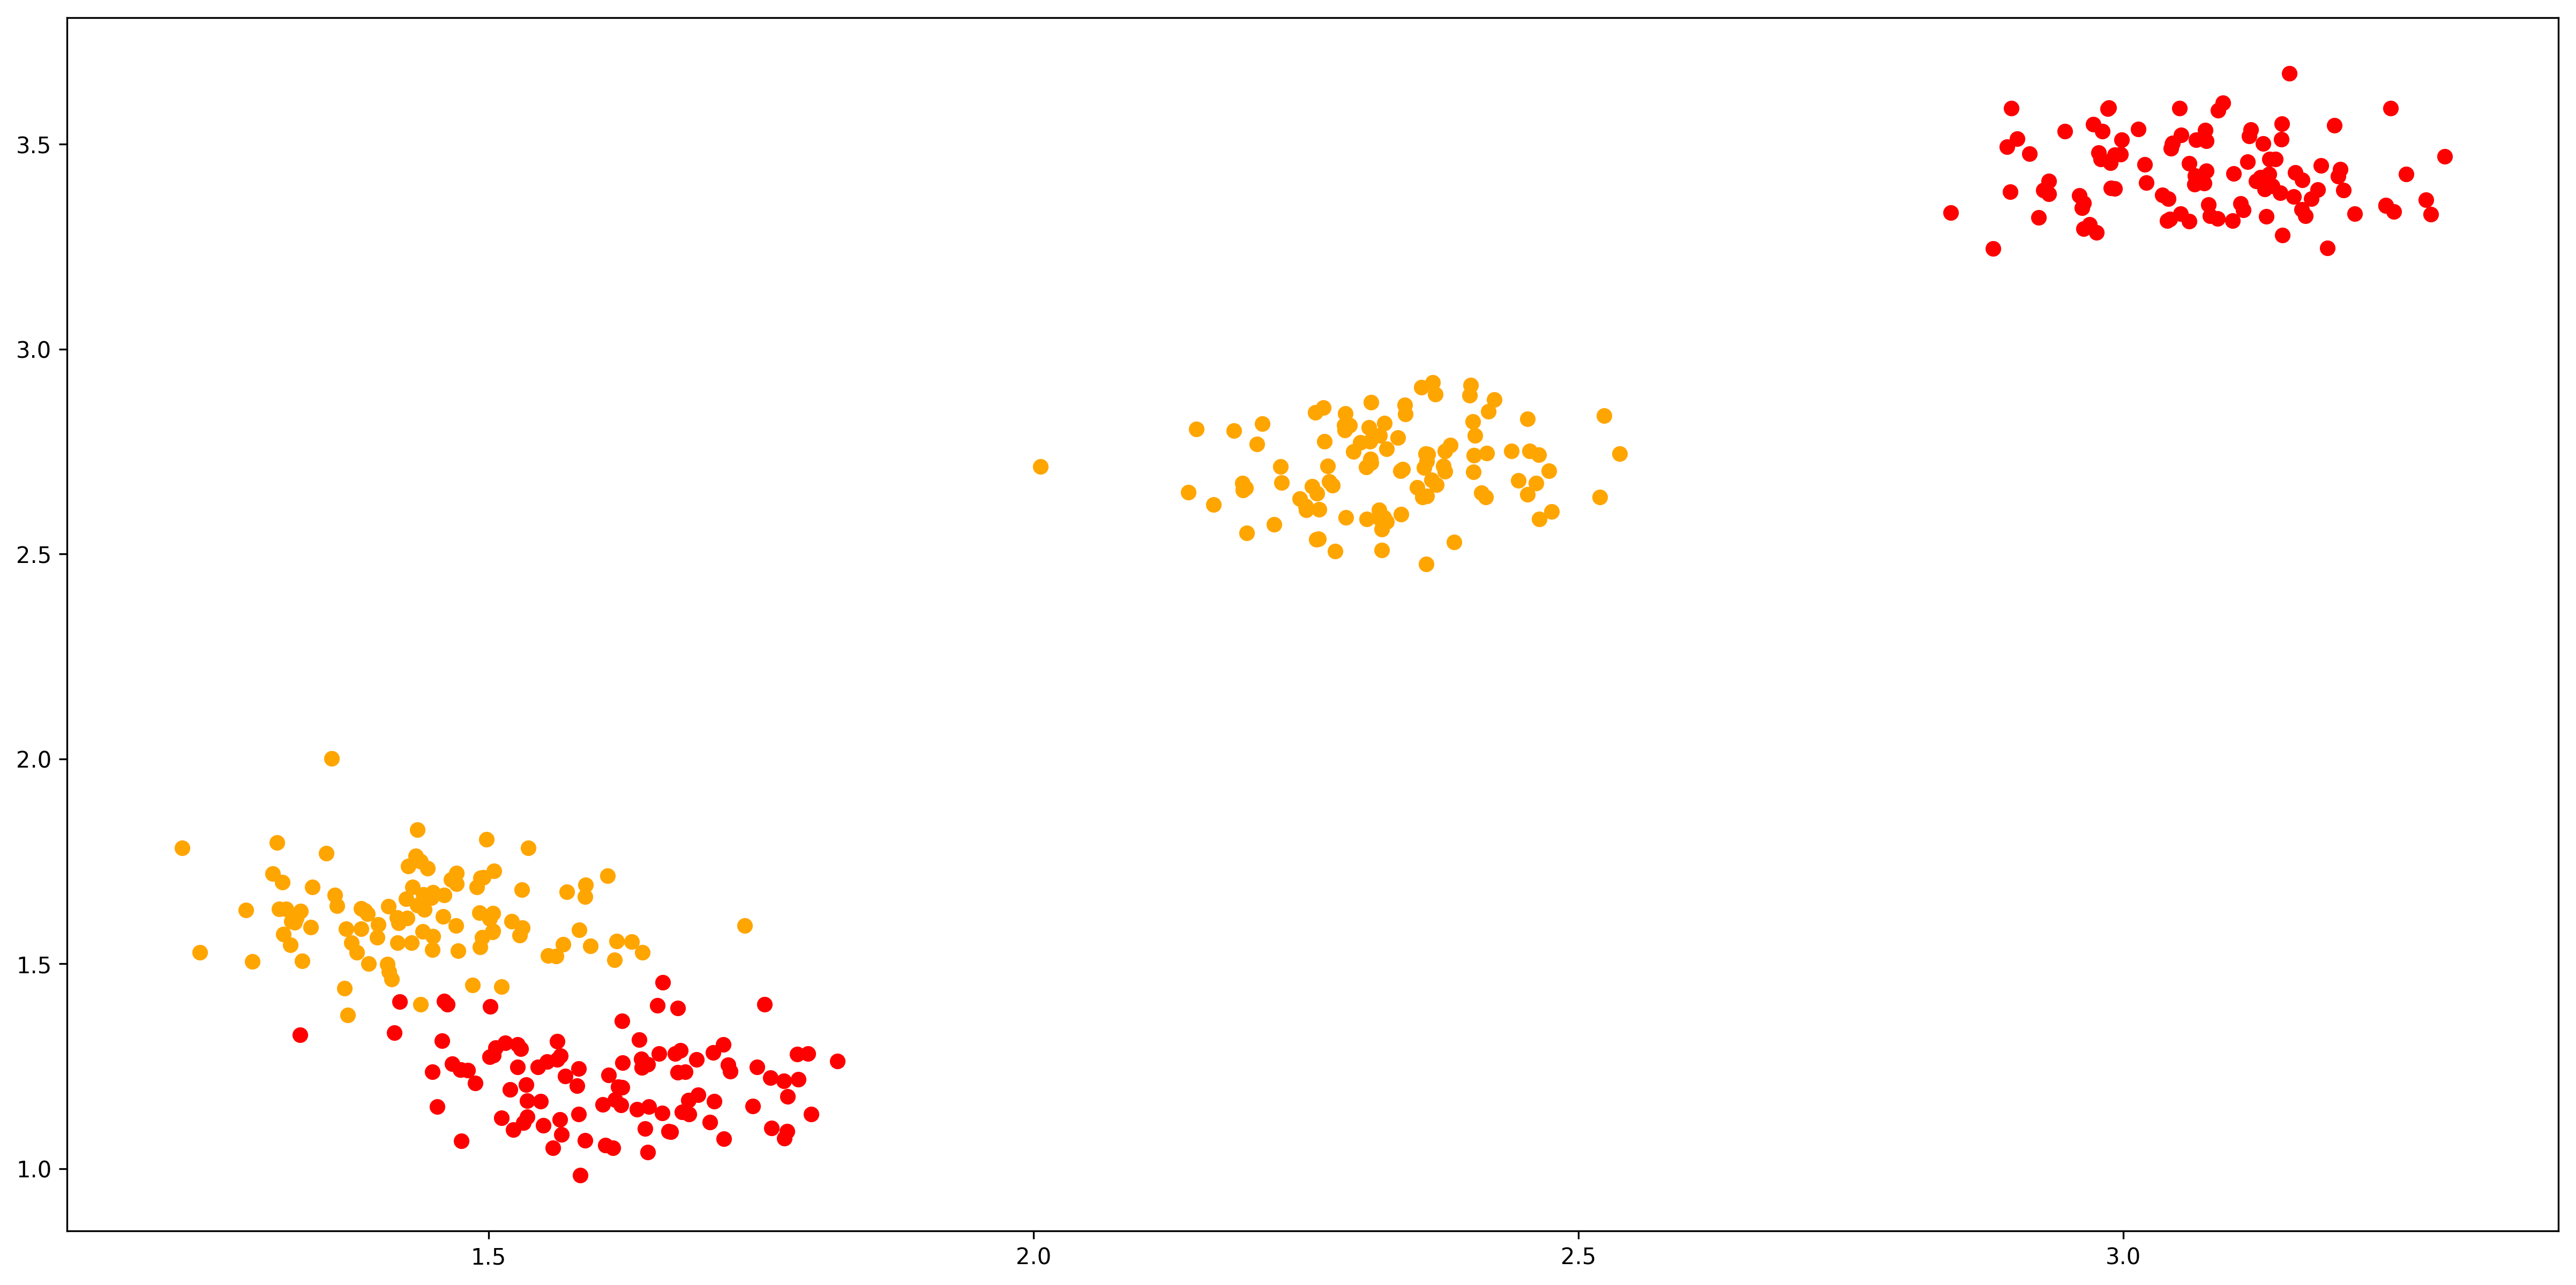

In [48]:
plt.figure(figsize=(20,10),dpi=300)
plt.scatter(data[data[:,0]==0][:,1], \
           data[data[:,0]==0][:,2],color='red')
plt.scatter(data[data[:,0]==1][:,1], \
           data[data[:,0]==1][:,2],color='orange')
plt.show()

In [49]:
train_features, test_features, train_labels, test_labels = train_test_split(data[:,1:],data[:,0],\
                                                                          test_size=0.33, random_state=12)

In [50]:
def distance(vect1,vect2):
    return np.linalg.norm(vect1-vect2)

In [51]:
pred_labels=np.ndarray(test_labels.size)
jol=0
rosszul=0
for j in range(test_labels.size):
    dist=np.ndarray(train_labels.size)
    for i in range(train_labels.size):
        dist[i]=distance(test_features[j],train_features[i])
    pred_labels[j]=train_labels[np.argmin(dist)]
    
    if (pred_labels[j]==test_labels[j]): jol+=1
    else: rosszul+=1
        
print(jol,rosszul)

131 1


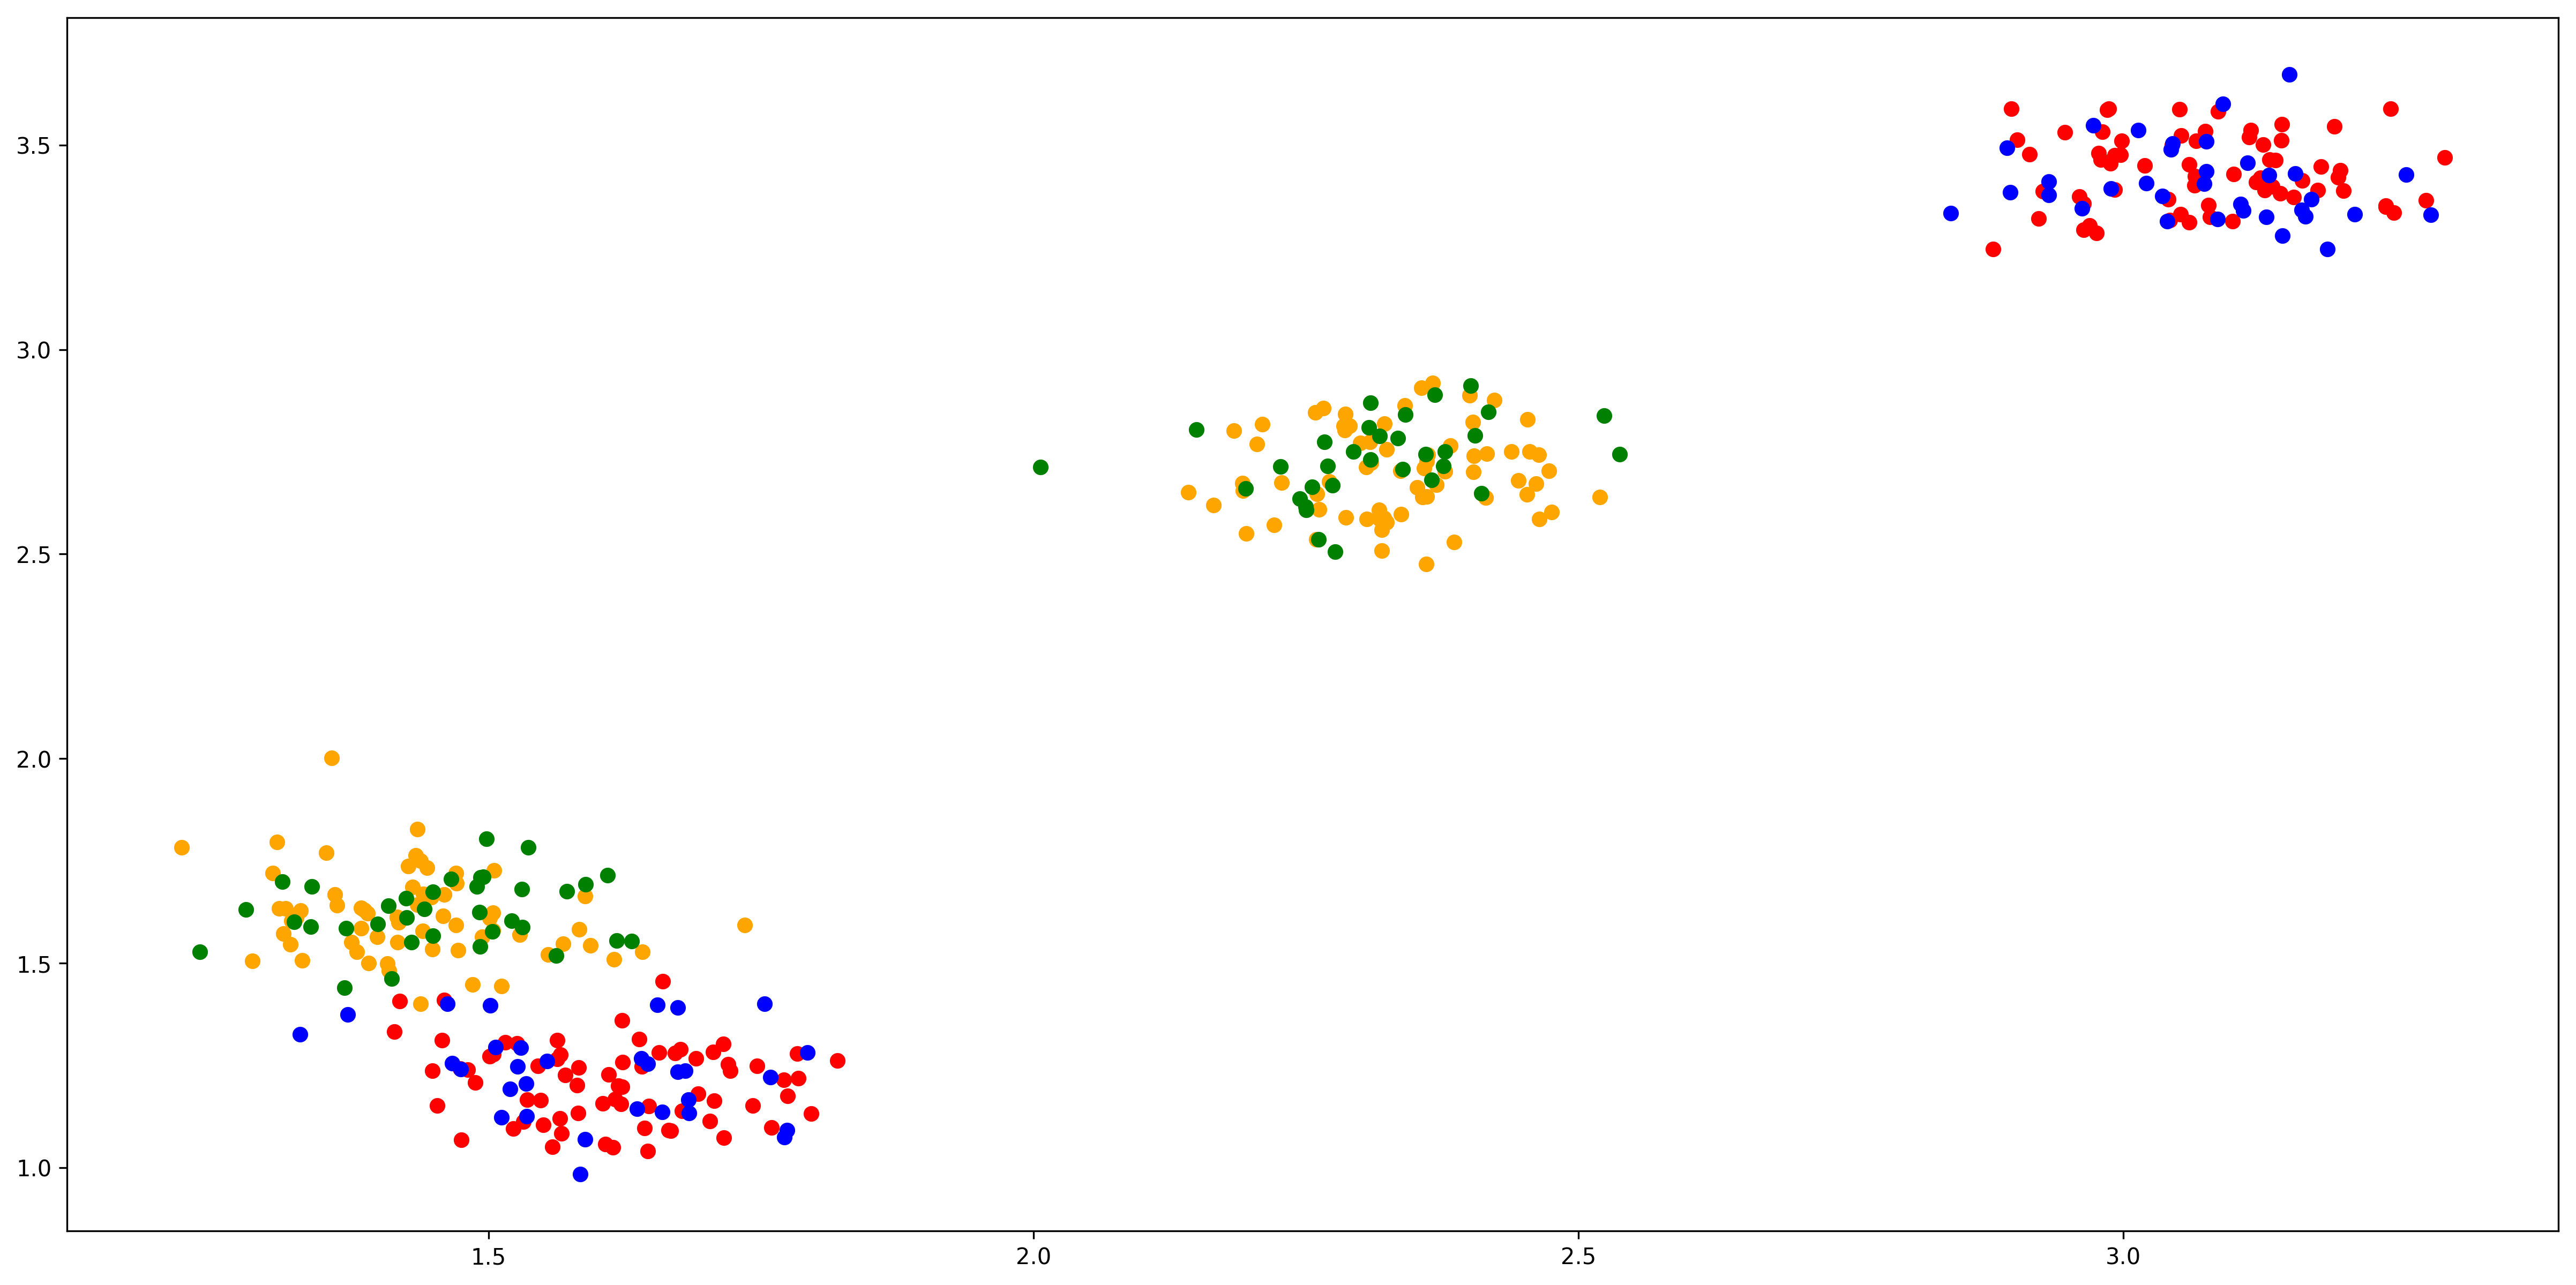

In [27]:
plt.figure(figsize=(20,10),dpi=300)
plt.scatter(train_features[train_labels==0][:,0], \
           train_features[train_labels==0][:,1], \
           color ='red')
plt.scatter(train_features[train_labels==1][:,0], \
           train_features[train_labels==1][:,1], \
           color ='orange')

plt.scatter(test_features[pred_labels==0][:,0], \
           test_features[pred_labels==0][:,1], \
           color ='blue')
plt.scatter(test_features[pred_labels==1][:,0], \
           test_features[pred_labels==1][:,1], \
           color ='green')
plt.show()

In [30]:
data=np.genfromtxt('kmeans_data2.txt')

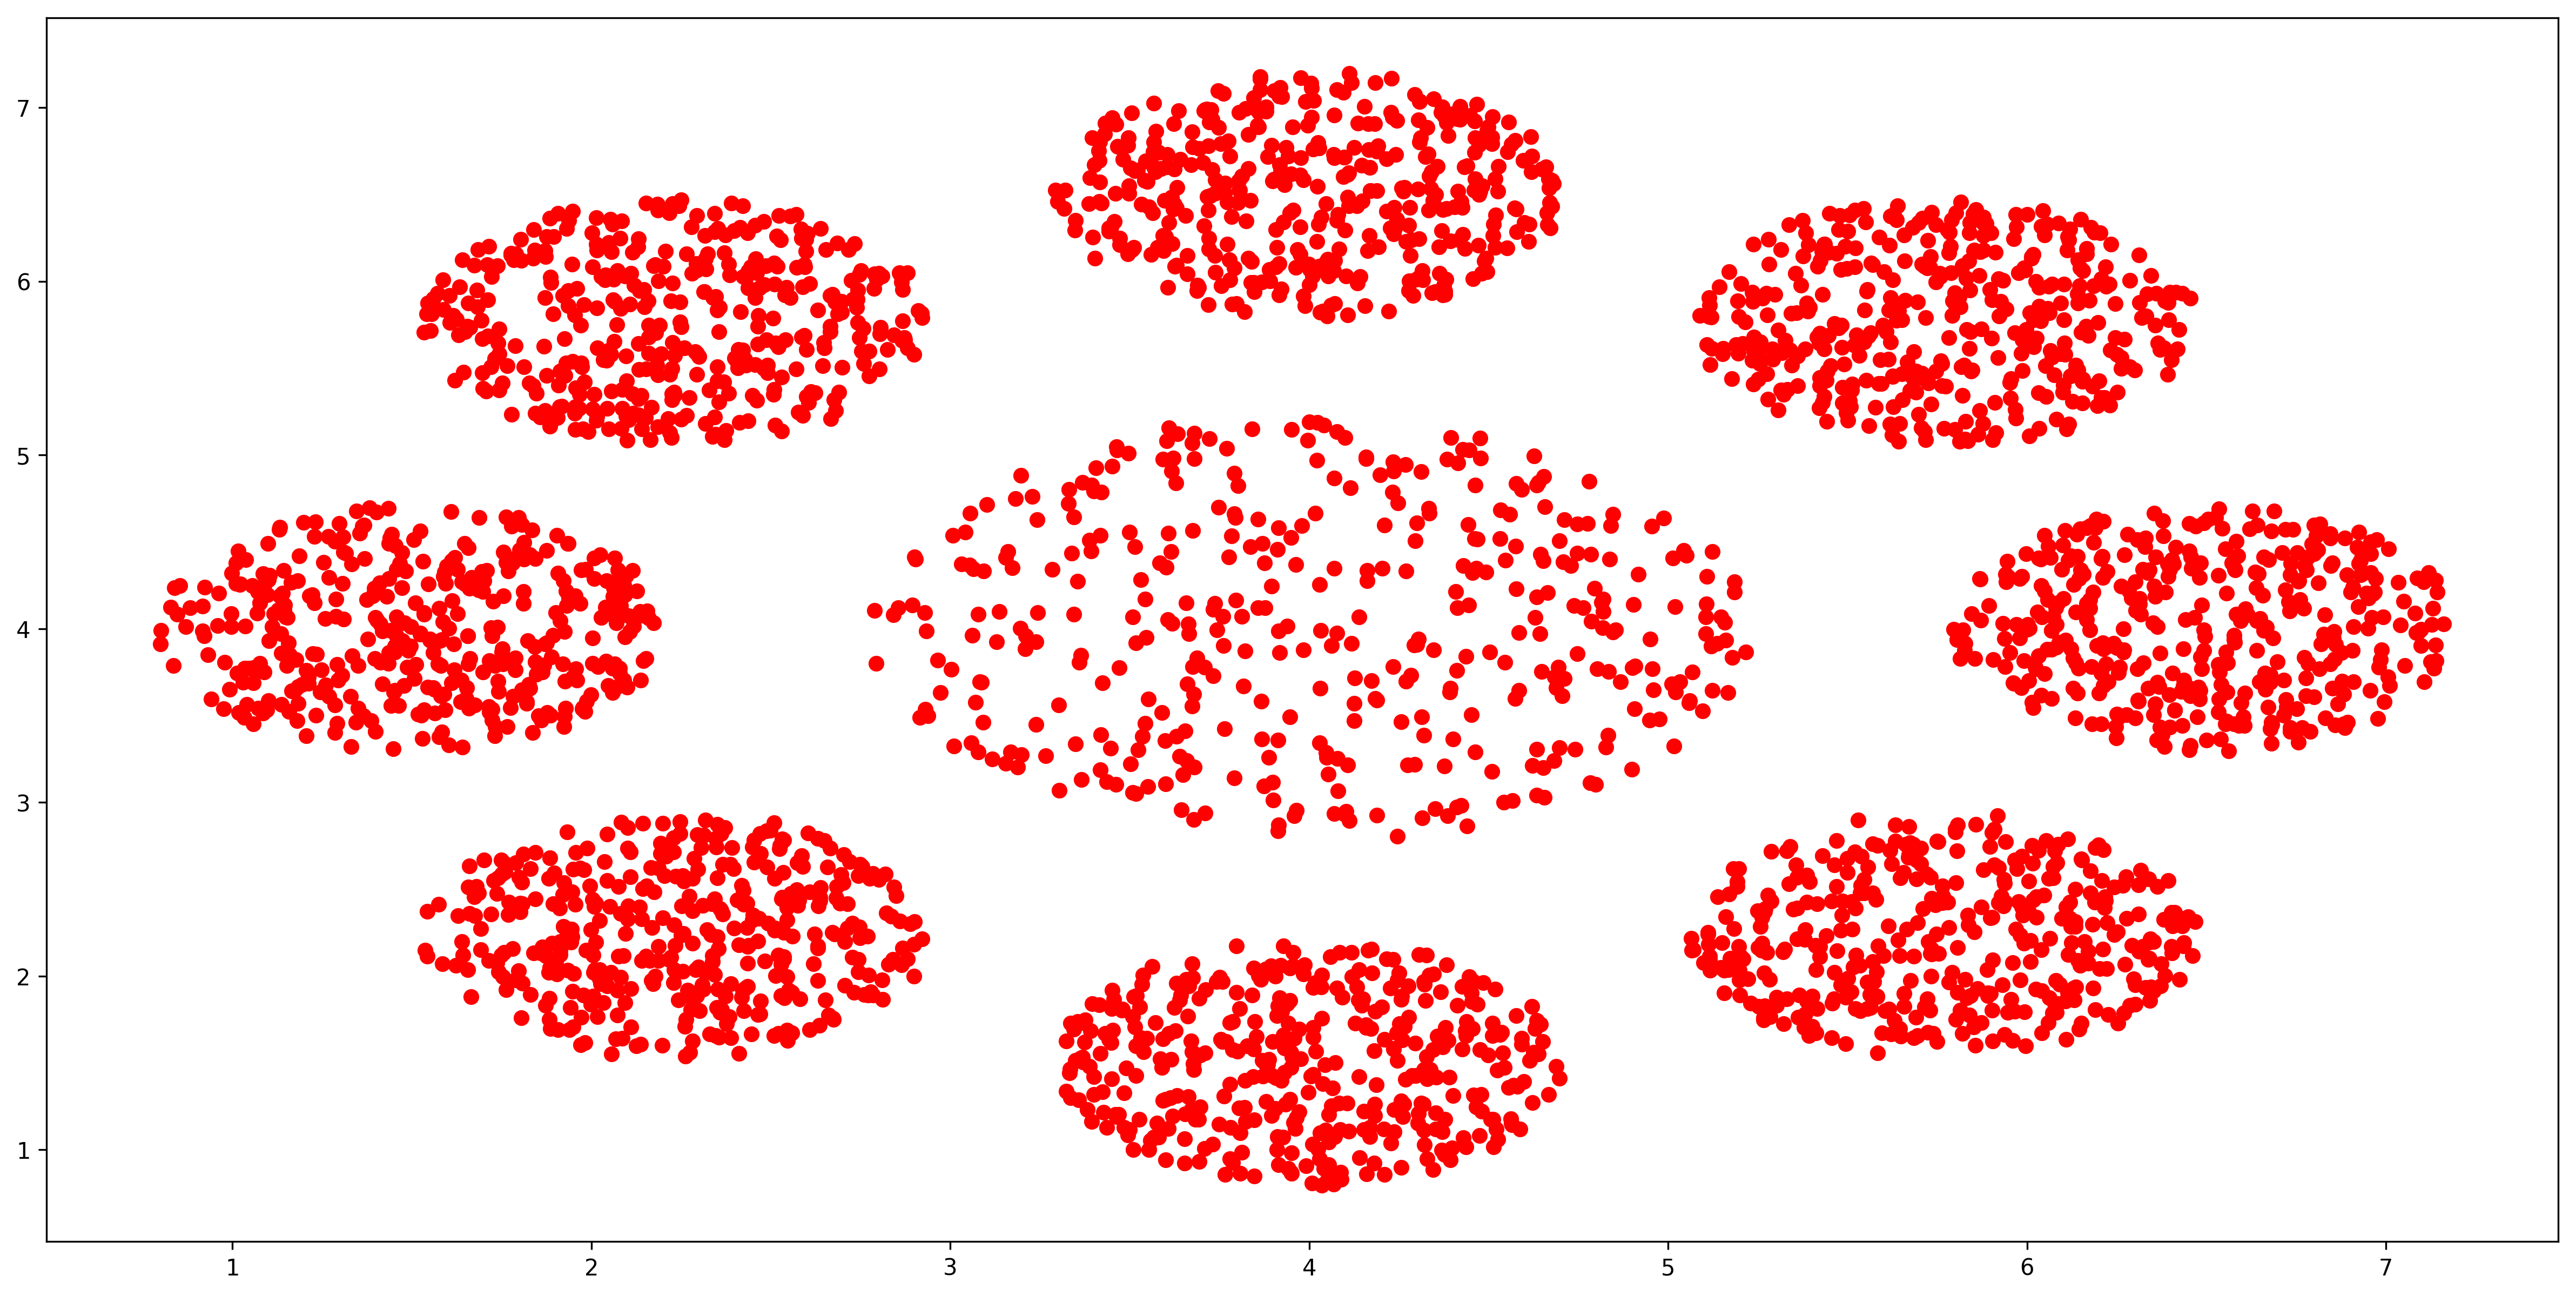

In [33]:
plt.figure(figsize=(20,10),dpi=300)
plt.scatter(data[:,0],data[:,1], color='red')
plt.show()

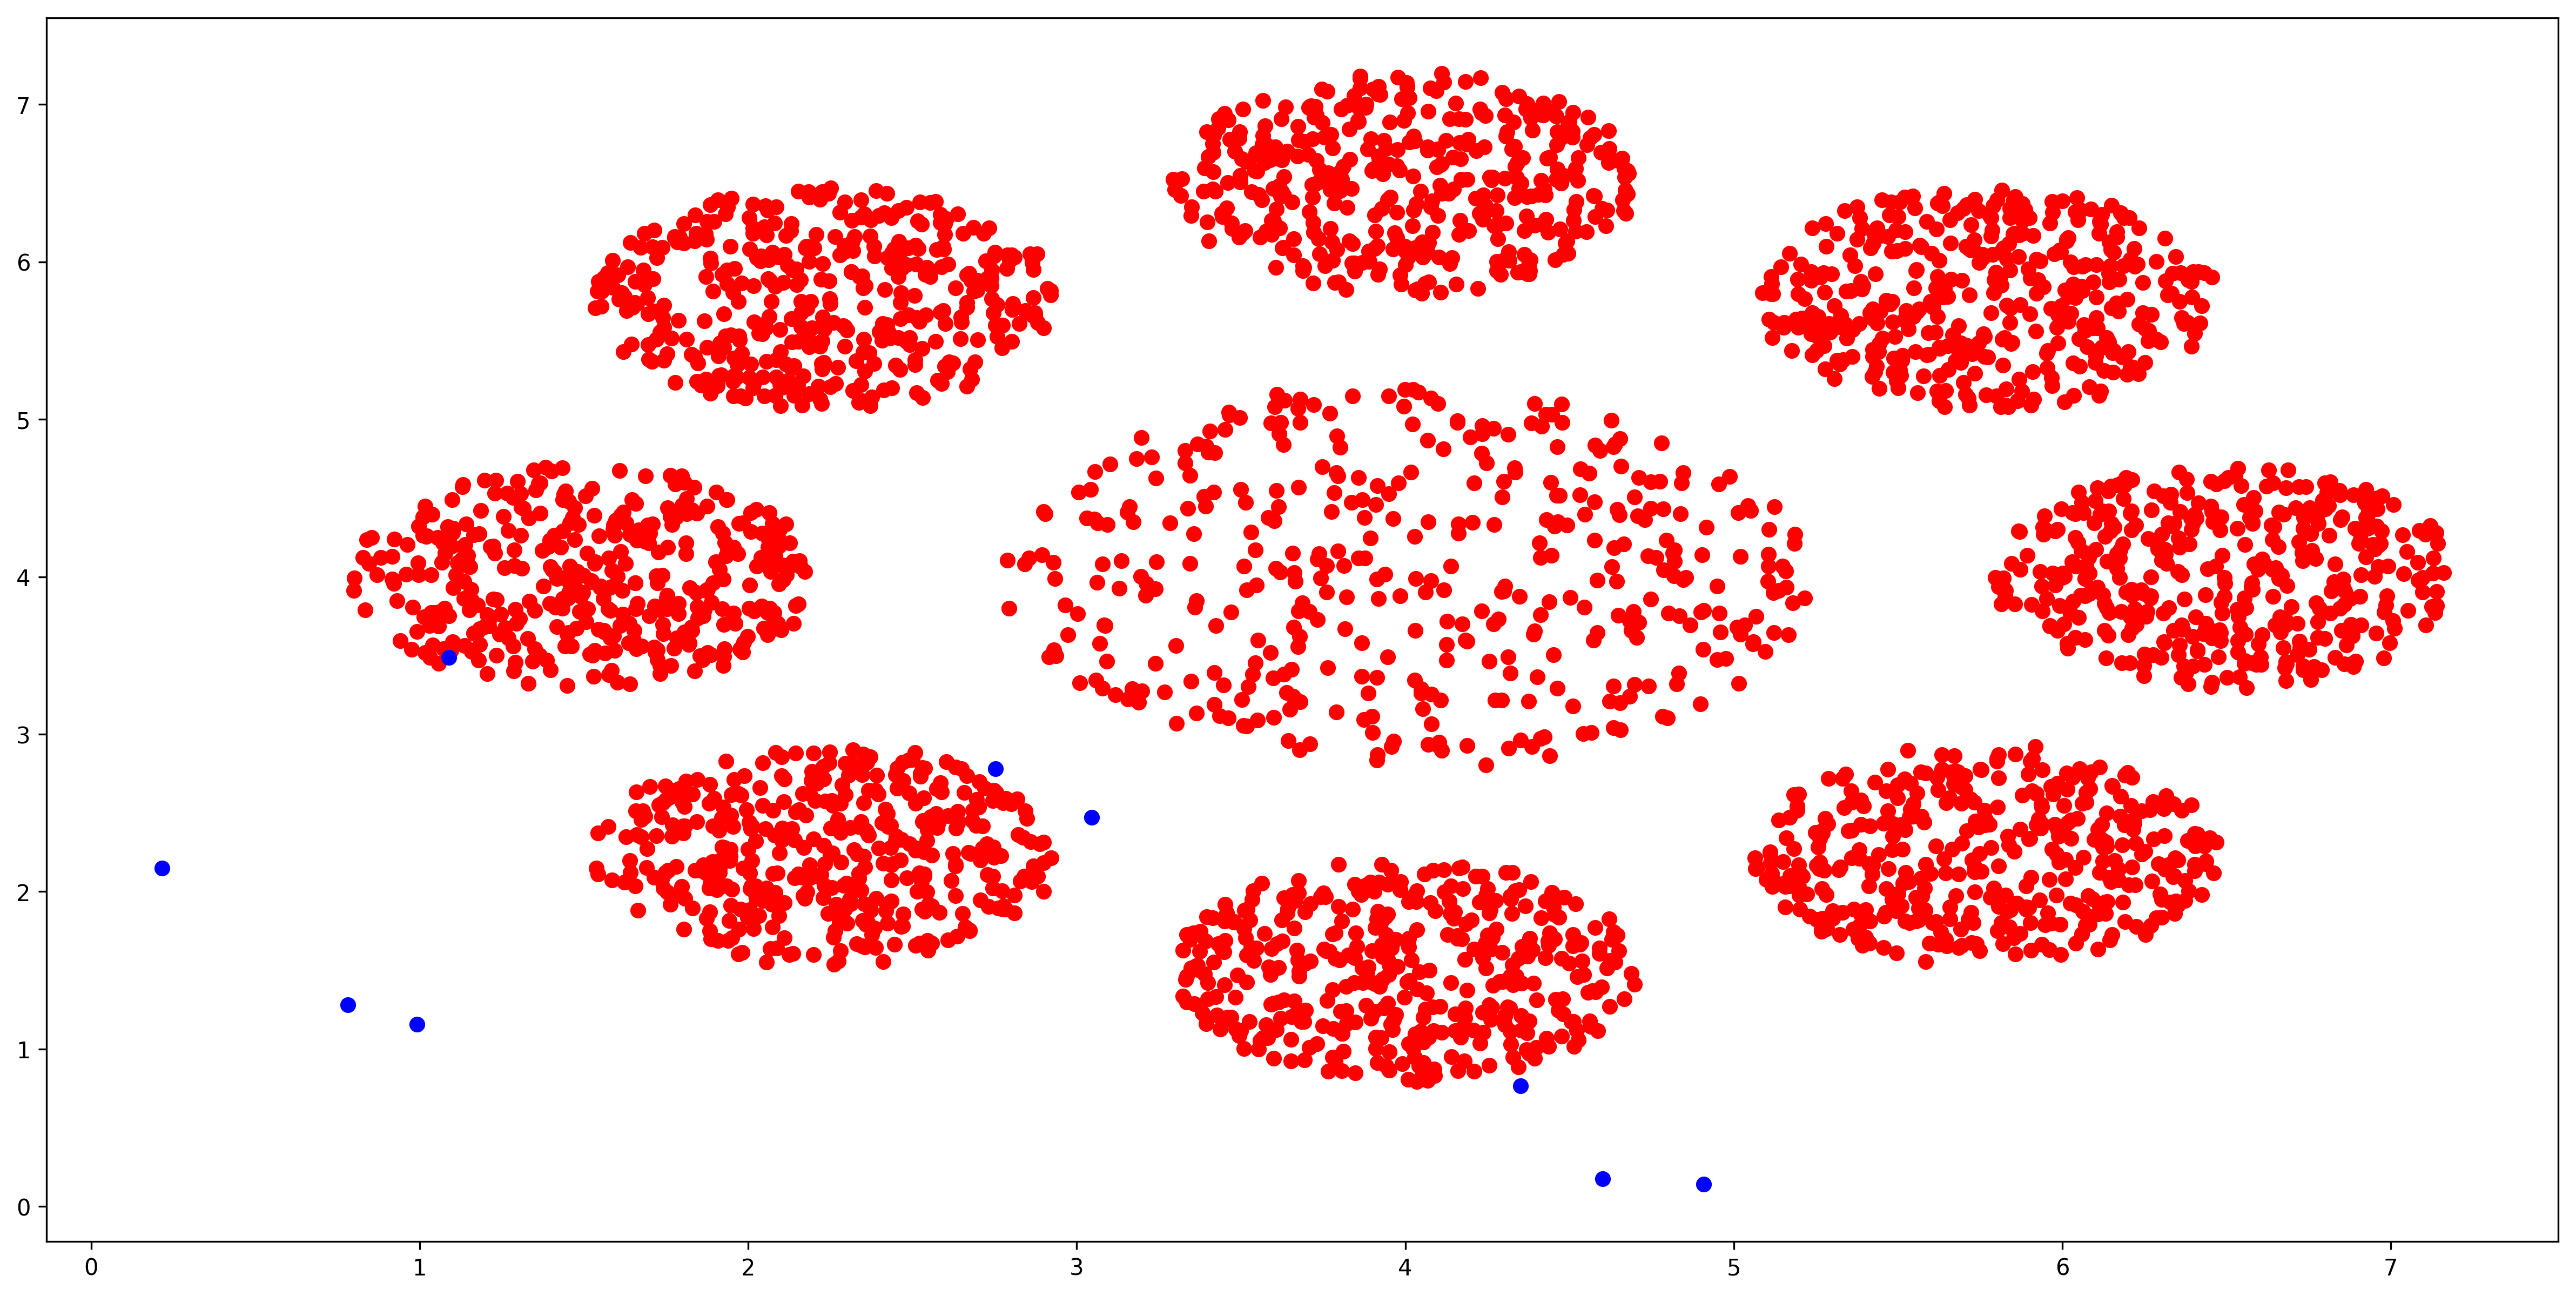

[ 1182.     0.   820.    36.    20.   737.     0.   805.     0.]
[ 619.    0.  805.  485.  190.  327.  342.  551.  281.]
[ 521.    0.  793.  487.  321.  247.  400.  432.  399.]
[ 497.   63.  740.  384.  400.  338.  400.  378.  400.]
[ 500.   91.  695.  351.  400.  373.  400.  390.  400.]
[ 503.  134.  661.  313.  400.  389.  400.  400.  400.]
[ 503.  191.  628.  286.  400.  392.  400.  400.  400.]
[ 496.  258.  581.  276.  400.  389.  400.  400.  400.]
[ 475.  324.  522.  290.  400.  389.  400.  400.  400.]
[ 428.  391.  452.  334.  400.  395.  400.  400.  400.]
[ 400.  400.  400.  402.  400.  398.  400.  400.  400.]
[ 400.  400.  400.  402.  400.  398.  400.  400.  400.]


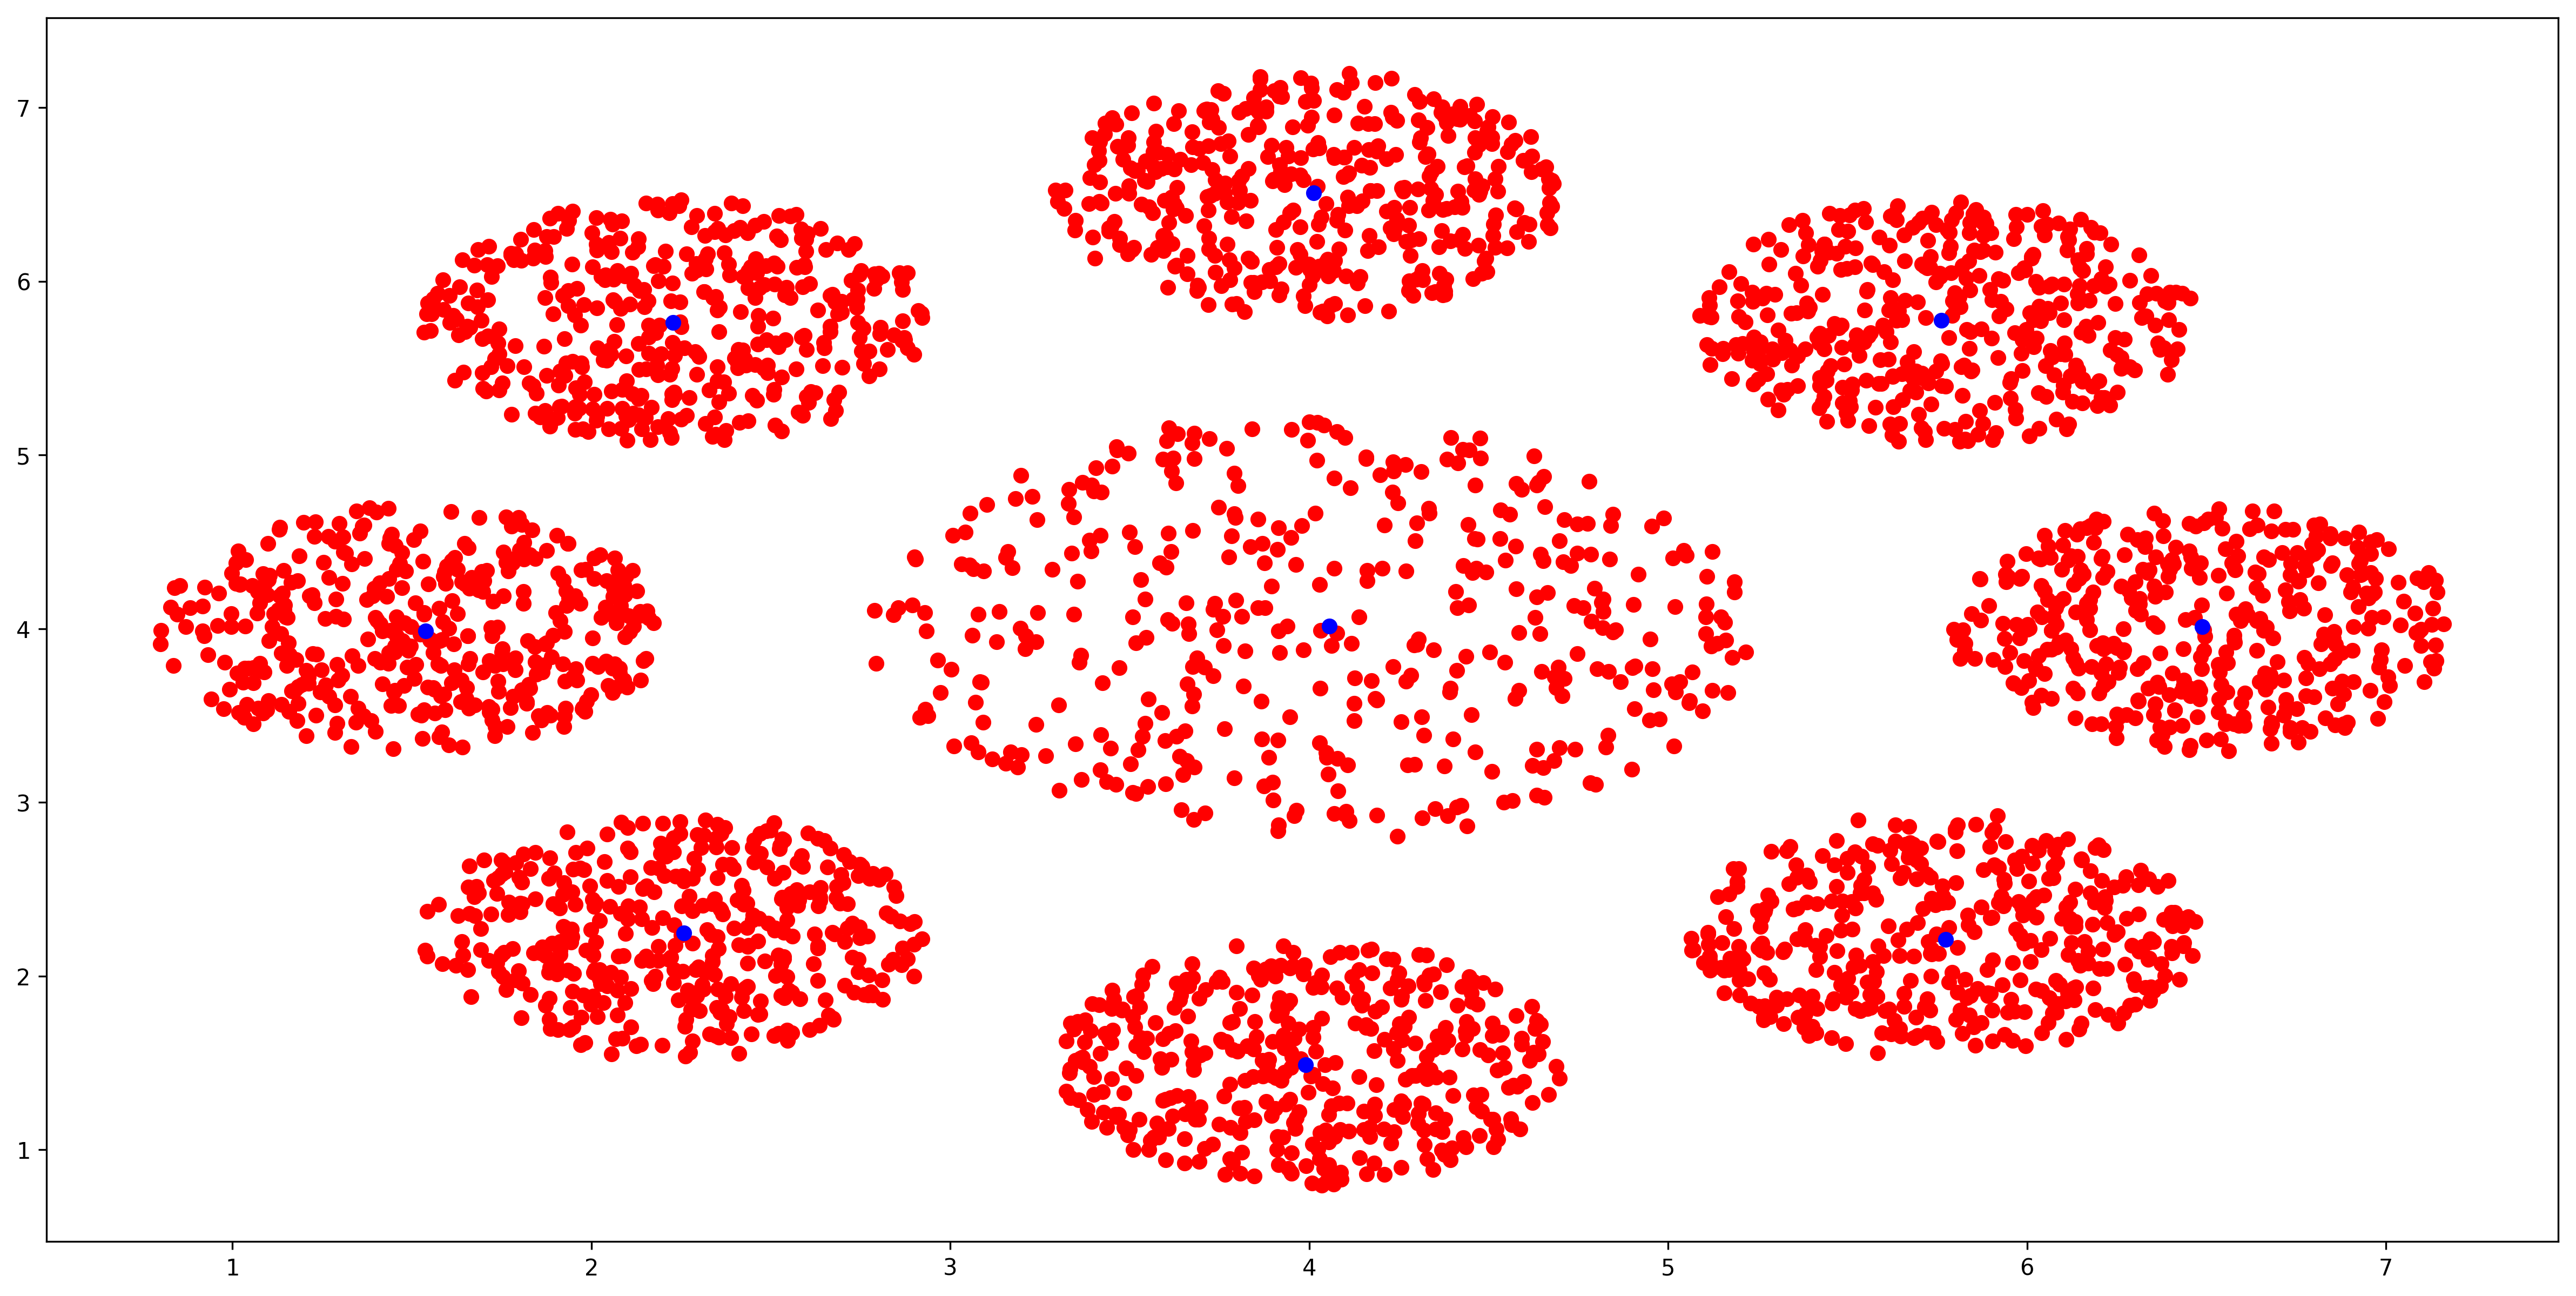

In [44]:
clusters=np.random.rand(9,2)*7
plt.figure(figsize=(20,10),dpi=300)
plt.scatter(data[:,0],data[:,1], color='red')
plt.scatter(clusters[:,0],clusters[:,1],color='blue')
plt.show()

pred_clust=np.ndarray(data[:,0].size)
num_elements=np.ndarray(clusters[:,0].size)

for iteration in range(50):
    prev_num=num_elements
    num_elements=np.zeros(clusters[:,0].size)
    for j in range(data[:,0].size):
        dist=np.ndarray(clusters[:,0].size)
        for i in range(clusters[:,0].size):
            dist[i]=distance(data[j,:],clusters[i,:])
        pred_clust[j]=np.argmin(dist)
        num_elements[np.argmin(dist)]+=1
    print(num_elements)
    if(np.array_equal(num_elements,prev_num)):
        break
    for i in range(clusters[:,0].size):
        clusters[i,:]=np.array([np.sum(data[pred_clust==i][:,0]), \
                               np.sum(data[pred_clust==i][:,1])])
        if num_elements[i]!=0:
            clusters[i,:]/=num_elements[i]
        else:
            clusters[i,:]=np.random.rand(2)*7
            
plt.figure(figsize=(20,10),dpi=300)
plt.scatter(data[:,0],data[:,1], color='red')
plt.scatter(clusters[:,0],clusters[:,1],color='blue')
plt.show()

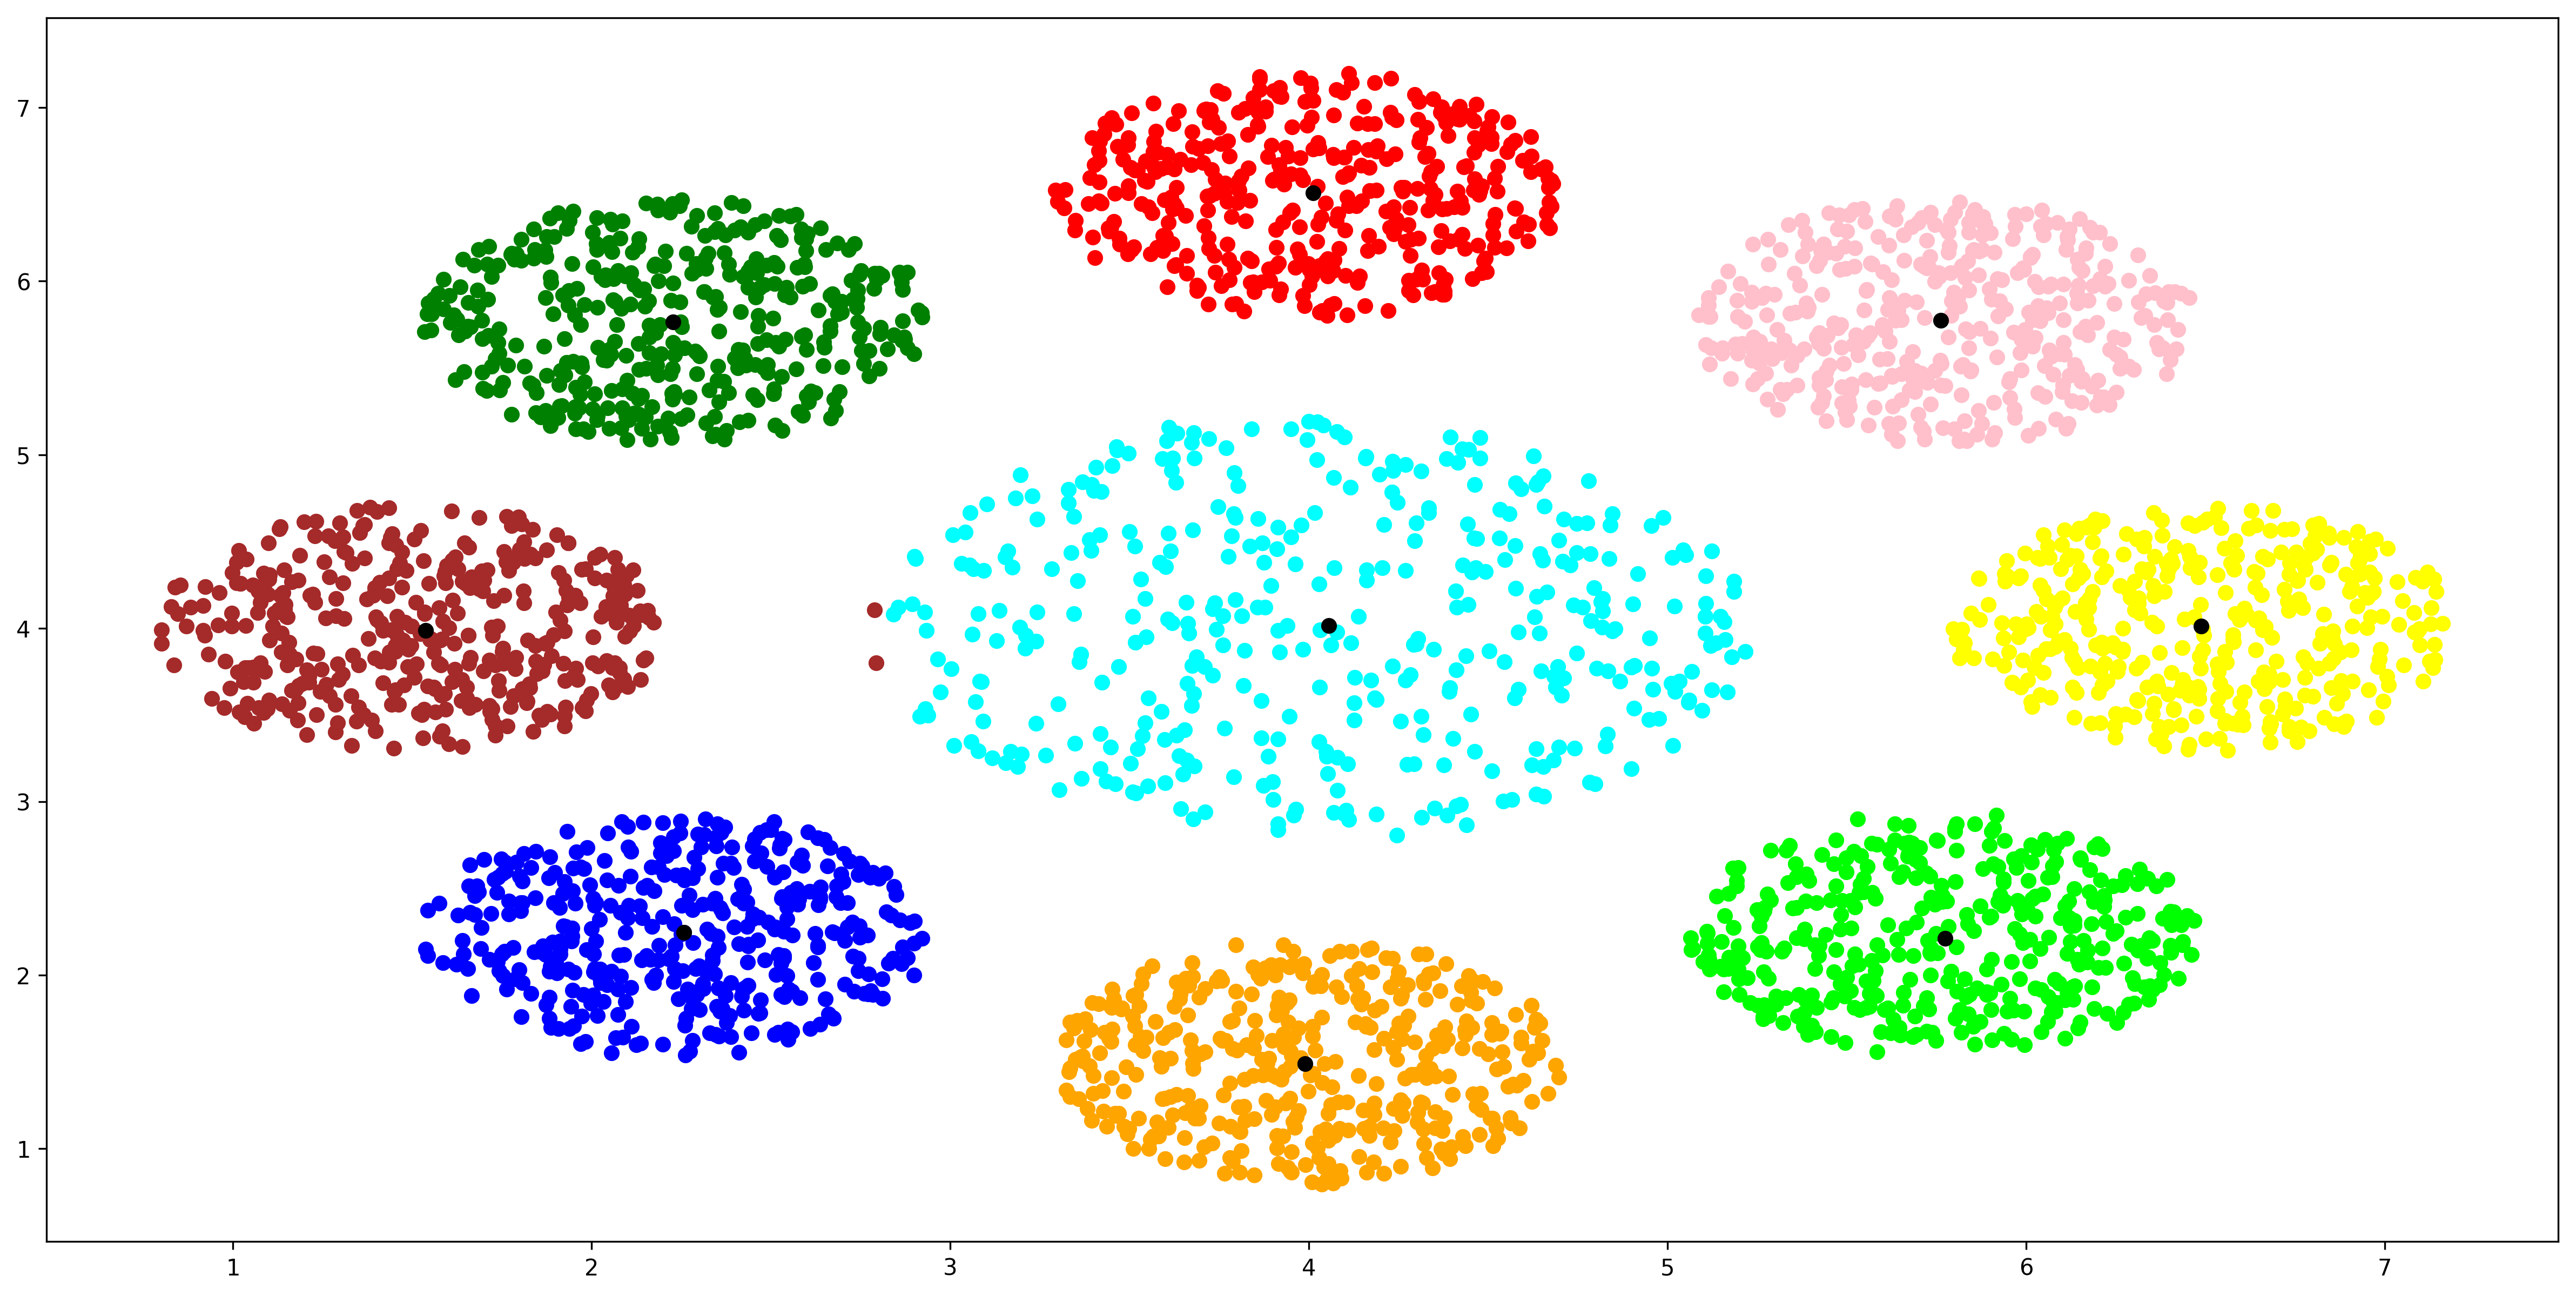

In [45]:
plt.figure(figsize=(20,10),dpi=300)
plt.scatter(data[pred_clust==0][:,0],data[pred_clust==0][:,1], color='red')
plt.scatter(data[pred_clust==1][:,0],data[pred_clust==1][:,1], color='blue')
plt.scatter(data[pred_clust==2][:,0],data[pred_clust==2][:,1], color='green')
plt.scatter(data[pred_clust==3][:,0],data[pred_clust==3][:,1], color='brown')
plt.scatter(data[pred_clust==4][:,0],data[pred_clust==4][:,1], color='lime')
plt.scatter(data[pred_clust==5][:,0],data[pred_clust==5][:,1], color='cyan')
plt.scatter(data[pred_clust==6][:,0],data[pred_clust==6][:,1], color='pink')
plt.scatter(data[pred_clust==7][:,0],data[pred_clust==7][:,1], color='orange')
plt.scatter(data[pred_clust==8][:,0],data[pred_clust==8][:,1], color='yellow')

plt.scatter(clusters[:,0],clusters[:,1], color='black')
plt.show()

In [7]:
def evszamkiiras(ev):
    for i in ev:
        print(i)
        
evszamkiiras('2017')

2
0
1
7
